In [ ]:
!pip install nibabel

In [ ]:
%load_ext autoreload
%autoreload 2
from data import get_dataloader
from args import parse_args

args = parse_args()
train_loader= get_dataloader(args)
print(train_loader)
# 데이터 확인
for fmri, image in train_loader:
    print(f"fMRI shape: {fmri.shape}")
    print(f"Image shape: {image.shape}")
    break

In [ ]:
# 자동 재로드
%load_ext autoreload
%autoreload 2

# 모듈 불러오기
from data import get_dataloader
from args import parse_args
import torch
from itertools import islice

# args 설정 및 dataloader 생성
args = parse_args()
train_loader = get_dataloader(args)

# 마지막 iteration만 가져오기 (shuffle=False 전제)
last_batch = list(islice(train_loader, len(train_loader) - 1, None))[0]
fmri, image = last_batch

# 정보 출력
print(f"✅ Last Batch Loaded")
print(f"fMRI shape: {fmri.shape}")
print(f"Image shape: {image.shape}")
print(f"fMRI NaNs: {torch.isnan(fmri).sum()}, Infs: {(fmri == float('inf')).sum()}")
print(f"fMRI max: {fmri.max()}, min: {fmri.min()}")
print(f"Image NaNs: {torch.isnan(image).sum()}, max: {image.max()}, min: {image.min()}")


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ First fMRI sample loaded
Shape: torch.Size([15724])
NaNs: 0, Infs: 0
Max: 4.931, Min: -4.090, Mean: 0.545


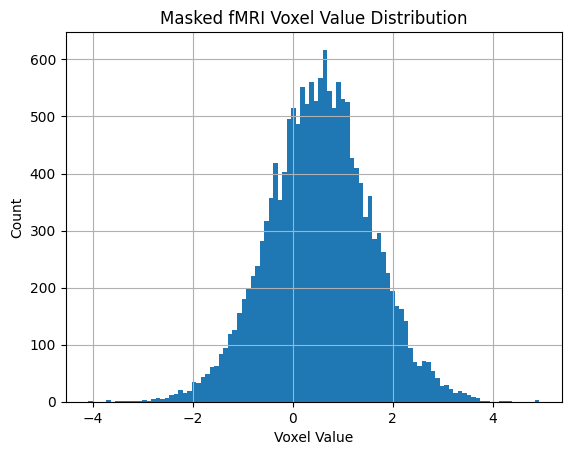

In [1]:
# args 정의
from args import parse_args
from data import get_dataloader

import torch
import matplotlib.pyplot as plt

# args 세팅
args = parse_args()
args.train = 1  # 혹시 train/test 플래그 필요하다면
args.shuffle = False  # 마지막 배치 추출을 위해 필수

# dataloader 불러오기
train_loader = get_dataloader(args)

# 첫 번째 배치 가져오기 (30, N_voxel)
fmri_batch, image_batch = next(iter(train_loader))

# 첫 번째 샘플 선택
fmri_sample = fmri_batch[25]  # shape: (N_voxel,)
image_sample = image_batch[25]  # shape: (3, 425, 425)

# 정보 출력
print(f"✅ First fMRI sample loaded")
print(f"Shape: {fmri_sample.shape}")
print(f"NaNs: {torch.isnan(fmri_sample).sum()}, Infs: {(fmri_sample == float('inf')).sum()}")
print(f"Max: {fmri_sample.max():.3f}, Min: {fmri_sample.min():.3f}, Mean: {fmri_sample.mean():.3f}")

# 히스토그램으로 값 분포 시각화
plt.hist(fmri_sample.cpu().numpy(), bins=100)
plt.title("Masked fMRI Voxel Value Distribution")
plt.xlabel("Voxel Value")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [ ]:
import nibabel as nib
import numpy as np

zscore_path = '/nas/research/03-Neural_decoding/3-bids/derivatives/b4_roi_zscore/sub-01/ses-01/func/sub-01_ses-01_desc-betaroizscore.nii.gz'
z_img = nib.load(zscore_path)
z_data = z_img.get_fdata()

print("Z-score 확인")
print("Mean:", z_data.mean())
print("Std:", z_data.std())
print("Max:", z_data.max())
print("Min:", z_data.min())

In [ ]:
import nibabel as nib
import numpy as np

zscore_path = '/nas/research/03-Neural_decoding/3-bids/derivatives/b4_roi/sub-01/betas_session01.nii.gz'
z_img = nib.load(zscore_path)
z_data = z_img.get_fdata()

print("Z-score 확인")
print("Mean:", z_data.mean())
print("Std:", z_data.std())
print("Max:", z_data.max())
print("Min:", z_data.min())

In [2]:
%load_ext autoreload
%autoreload 2
from data import get_dataloader, sub1_train_dataset, sub1_test_dataset, sub1_train_dataset_FuncSpatial
from args import parse_args

args = parse_args()

train_dataset = sub1_train_dataset_FuncSpatial(args)


print(f"Train dataset size: {len(train_dataset)}")

# 샘플 확인 (첫 3개)
for i in range(3):
    fmri, cocoid= train_dataset[i]
    print(f"\nSample {i}:")
    print(f"fMRI shape: {fmri.shape}, type: {type(fmri)}")
    print(f"fMRI values (first 5): {fmri[:5]}")
    print(f"COCO ID: {cocoid}, type: {type(cocoid)}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Train dataset size: 25611

Sample 0:
fMRI shape: torch.Size([15724]), type: <class 'torch.Tensor'>
fMRI values (first 5): tensor([-0.4033, -0.6196, -0.9312,  0.0794, -0.7905])
COCO ID: tensor([[[0.4235, 0.4235, 0.4392,  ..., 0.4039, 0.4039, 0.4000],
         [0.4314, 0.4314, 0.4196,  ..., 0.3922, 0.3882, 0.4196],
         [0.4314, 0.4392, 0.4196,  ..., 0.4039, 0.4314, 0.4627],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1647, 0.2588, 0.2078],
         [0.0000, 0.0000, 0.0000,  ..., 0.1686, 0.2471, 0.2275],
         [0.0000, 0.0000, 0.0000,  ..., 0.2039, 0.1961, 0.2510]],

        [[0.3412, 0.3412, 0.3569,  ..., 0.3176, 0.3098, 0.3059],
         [0.3490, 0.3490, 0.3373,  ..., 0.3059, 0.2941, 0.3255],
         [0.3412, 0.3490, 0.3373,  ..., 0.3137, 0.3373, 0.3686],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1804, 0.2706, 0.2196],
         [0.0000, 0.0000, 0.0039,  ..., 0.1843,

In [21]:
import numpy as np

file_path = "/nas/research/03-Neural_decoding/3-bids/derivatives/beta_hf_dk/beta_hf_dk_train.npz"
data = np.load(file_path, allow_pickle=True)

print("Shape:", type(data['X']))
print("Shape:", data['X'].shape)
print("Dtype:", data['X'].dtype)
data['Y']



Shape: <class 'numpy.ndarray'>
Shape: (25611, 20, 2056)
Dtype: float16


array(['coco2017_14.jpg', 'coco2017_14.jpg', 'coco2017_14.jpg', ...,
       'coco2017_73000.jpg', 'coco2017_73000.jpg', 'coco2017_73000.jpg'],
      dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# 저장된 FC 행렬 로드
fc_path = "/nas/research/03-Neural_decoding/3-bids/derivatives/raw_rest/sub-01/fc_matrix_vis20_mean.npy"
fc_matrix = np.load(fc_path)

# 1) 간단히 cmap 변경하기: 예를 들어 'viridis', 'plasma', 'magma', 'cividis' 등
plt.figure(figsize=(8, 6))
plt.imshow(fc_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar(label='Pearson Correlation')
plt.title('Functional Connectivity Matrix (DK atlas) - viridis')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

# 2) Diverging colormap 사용: 양/음의 구분을 명확히 하기 위해, 'RdBu_r'나 'seismic', 'bwr' 등을 사용
plt.figure(figsize=(8, 6))
plt.imshow(fc_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar(label='Pearson Correlation')
plt.title('Functional Connectivity Matrix (DK atlas) - RdBu_r')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

# 3) 0을 중심으로 색상 분포를 강조하려면 TwoSlopeNorm 사용
#    (vmin, vmax를 -1,1로 두었을 때 0 기준으로 중간색이 정확히 걸리도록)
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
plt.figure(figsize=(8, 6))
plt.imshow(fc_matrix, cmap='RdBu_r', norm=norm)
plt.colorbar(label='Pearson Correlation')
plt.title('Functional Connectivity Matrix (DK atlas) - RdBu_r with center=0')
plt.xlabel('ROI')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

# 4) 다른 콜러맵 리스트 예시
available = ['viridis', 'plasma', 'magma', 'cividis',
             'inferno', 'cubehelix',      # sequential
             'RdBu_r', 'seismic', 'bwr',  # diverging
             'PuOr', 'PiYG', 'coolwarm']  # diverging
# 반복해서 플롯해보기 (선택적으로)
for cmap_name in ['plasma', 'seismic', 'coolwarm']:
    plt.figure(figsize=(6, 5))
    plt.imshow(fc_matrix, cmap=cmap_name, vmin=-1, vmax=1)
    plt.title(f'FC Matrix - {cmap_name}')
    plt.colorbar(label='Pearson Correlation')
    plt.tight_layout()
    plt.show()


In [1]:
import torch

path = "/nas/research/03-Neural_decoding/5-mindeye_code/output/mindeye2_pretrain_257_0901.pt"  # 예: "unclip6_epoch0_step110000.ckpt"
ckpt = torch.load(path, map_location="cpu")

print(type(ckpt))
print(ckpt.keys())  # 최상위 키 구조 확인

<class 'collections.OrderedDict'>
odict_keys(['ridge.linears.0.weight', 'ridge.linears.0.bias', 'ridge.linears.1.weight', 'ridge.linears.1.bias', 'ridge.linears.2.weight', 'ridge.linears.2.bias', 'backbone.backbone_mlp.0.0.weight', 'backbone.backbone_mlp.0.0.bias', 'backbone.backbone_mlp.0.1.weight', 'backbone.backbone_mlp.0.1.bias', 'backbone.backbone_mlp.0.4.weight', 'backbone.backbone_mlp.0.4.bias', 'backbone.backbone_mlp.1.0.weight', 'backbone.backbone_mlp.1.0.bias', 'backbone.backbone_mlp.1.1.weight', 'backbone.backbone_mlp.1.1.bias', 'backbone.backbone_mlp.1.4.weight', 'backbone.backbone_mlp.1.4.bias', 'backbone.backbone_mlp.2.0.weight', 'backbone.backbone_mlp.2.0.bias', 'backbone.backbone_mlp.2.1.weight', 'backbone.backbone_mlp.2.1.bias', 'backbone.backbone_mlp.2.4.weight', 'backbone.backbone_mlp.2.4.bias', 'backbone.backbone_mlp.3.0.weight', 'backbone.backbone_mlp.3.0.bias', 'backbone.backbone_mlp.3.1.weight', 'backbone.backbone_mlp.3.1.bias', 'backbone.backbone_mlp.3.4.weight'

In [10]:
import numpy as np

# 파일 경로
path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_huggingface/sub-01/sub-01_fmri_with_labels_train.npz"

# 데이터 로드
data = np.load(path, allow_pickle=True)

# 키 확인 (보통 'X', 'Y'가 있을 것)
print("Keys:", data.files)

# Y 데이터 로드
Y = data['Y']

# 기본 정보 출력
print("Y type:", type(Y))
print("Y shape:", np.shape(Y))

# 처음 10개만 출력
print("Y sample values:", Y[:10])



Keys: ['X', 'Y']
Y type: <class 'numpy.ndarray'>
Y shape: (27000,)
Y sample values: ['coco2017_14.jpg' 'coco2017_14.jpg' 'coco2017_14.jpg' 'coco2017_28.jpg'
 'coco2017_28.jpg' 'coco2017_28.jpg' 'coco2017_72.jpg' 'coco2017_72.jpg'
 'coco2017_72.jpg' 'coco2017_86.jpg']


Original size: (224, 224)


/tmp/ipykernel_713318/2388663796.py:21: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img_resized = img.resize((512, 512), Image.BICUBIC)


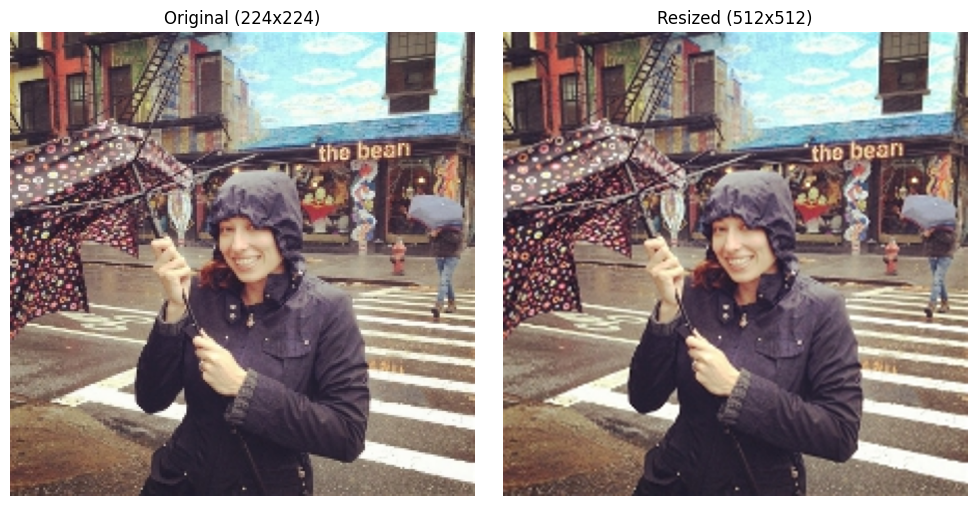

In [7]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 폴더 경로 (원하는 경로로 변경)
img_dir = "/nas/research/03-Neural_decoding/4-image/nsd_beta_img"

# 폴더 내 모든 이미지 파일 리스트
img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 첫 번째 이미지만 예시로 볼 때
img_path = os.path.join(img_dir, img_files[3])

# 원본 이미지 열기
img = Image.open(img_path).convert("RGB")

# 원본 해상도 출력
print(f"Original size: {img.size}")  # (width, height)

# 512x512로 resize
img_resized = img.resize((512, 512), Image.BICUBIC)

# 시각적으로 비교
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title(f"Original ({img.size[0]}x{img.size[1]})")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_resized)
plt.title("Resized (512x512)")
plt.axis("off")

plt.tight_layout()
plt.show()


Original size: (224, 224)


/tmp/ipykernel_713318/1539702071.py:22: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  img_resized = img.resize((512, 512), Image.BICUBIC)


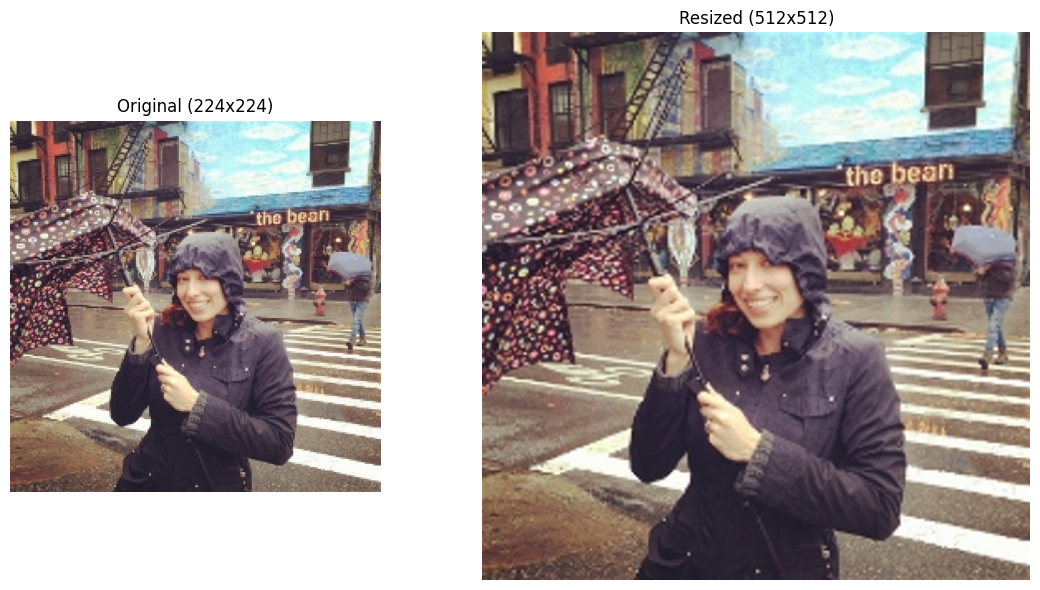

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 🔧 폴더 경로
img_dir = "/nas/research/03-Neural_decoding/4-image/nsd_beta_img"

# 폴더 내 모든 이미지 파일 리스트
img_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# img_files.sort()  # 정렬 (선택 사항)

# 첫 번째 이미지만 예시
img_path = os.path.join(img_dir, img_files[3])

# 원본 이미지 열기
img = Image.open(img_path).convert("RGB")

# 원본 해상도 출력
print(f"Original size: {img.size}")  # (width, height)

# 512x512로 resize
img_resized = img.resize((512, 512), Image.BICUBIC)

# 🔍 시각적으로 실제 크기 비율을 반영하여 비교
# subplot 비율을 이미지 크기 비율에 맞게 설정
fig, axes = plt.subplots(1, 2, figsize=(12, 6),
                         gridspec_kw={'width_ratios': [img.size[0], img_resized.size[0]]})

# 왼쪽: 원본
axes[0].imshow(img)
axes[0].set_title(f"Original ({img.size[0]}x{img.size[1]})")
axes[0].axis("off")

# 오른쪽: 리사이즈
axes[1].imshow(img_resized)
axes[1].set_title(f"Resized ({img_resized.size[0]}x{img_resized.size[1]})")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [3]:
from transformers import CLIPModel  # 또는 CLIPVisionModelWithProjection
import torch.nn as nn

model_id = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K"  # 예시
model = CLIPModel.from_pretrained(model_id)

# 1) 전부 동결
for p in model.parameters():
    p.requires_grad = False

# 2) 비전 타워에서 self-attention + FFN 열기
vision = model.vision_model  # CLIPVisionModel

target_suffixes = (
    # self-attention (CLIP 스타일)
    "self_attn.q_proj", "self_attn.k_proj", "self_attn.v_proj", "self_attn.out_proj",
    # FFN / MLP (CLIP 스타일)
    "mlp.fc1", "mlp.fc2",
    # ── 호환용: ViT/BEiT 스타일 네이밍을 쓰는 경우까지 커버
    "attention.output.dense",         # (주의: 이것만 쓰면 FFN이 아님. 아래 둘이 FFN)
    "intermediate.dense", "output.dense",
)

opened = []

for name, module in vision.named_modules():
    if name.endswith(target_suffixes):
        for p in module.parameters():
            p.requires_grad = True
        opened.append(name)

# (선택) LayerNorm도 함께 열기
# for name, module in vision.named_modules():
#     if isinstance(module, nn.LayerNorm):
#         for p in module.parameters():
#             p.requires_grad = True
#         opened.append(name)

# 확인
trainable = [n for n, p in model.named_parameters() if p.requires_grad]
print(f"Opened submodules ({len(opened)}):")
print("\n".join(opened))
print(f"\nTrainable params count: {len(trainable)}")
for n in trainable[:20]:
    print(n)
if len(trainable) > 20:
    print("... (truncated)")


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Opened submodules (192):
encoder.layers.0.self_attn.k_proj
encoder.layers.0.self_attn.v_proj
encoder.layers.0.self_attn.q_proj
encoder.layers.0.self_attn.out_proj
encoder.layers.0.mlp.fc1
encoder.layers.0.mlp.fc2
encoder.layers.1.self_attn.k_proj
encoder.layers.1.self_attn.v_proj
encoder.layers.1.self_attn.q_proj
encoder.layers.1.self_attn.out_proj
encoder.layers.1.mlp.fc1
encoder.layers.1.mlp.fc2
encoder.layers.2.self_attn.k_proj
encoder.layers.2.self_attn.v_proj
encoder.layers.2.self_attn.q_proj
encoder.layers.2.self_attn.out_proj
encoder.layers.2.mlp.fc1
encoder.layers.2.mlp.fc2
encoder.layers.3.self_attn.k_proj
encoder.layers.3.self_attn.v_proj
encoder.layers.3.self_attn.q_proj
encoder.layers.3.self_attn.out_proj
encoder.layers.3.mlp.fc1
encoder.layers.3.mlp.fc2
encoder.layers.4.self_attn.k_proj
encoder.layers.4.self_attn.v_proj
encoder.layers.4.self_attn.q_proj
encoder.layers.4.self_attn.out_proj
encoder.layers.4.mlp.fc1
encoder.layers.4.mlp.fc2
encoder.layers.5.self_attn.k_proj
e

In [14]:
import numpy as np

npz_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100.npz"

data = np.load(npz_path, allow_pickle=True)

print("=== Keys in npz file ===")
for k in data.files:
    arr = data[k]
    print(f"\nKey: {k}")
    print(f"  type  : {type(arr)}")
    print(f"  shape : {arr.shape}")
    print(f"  dtype : {arr.dtype}")

=== Keys in npz file ===

Key: beta
  type  : <class 'numpy.ndarray'>
  shape : (100, 3000, 3291)
  dtype : float32

Key: stimuli
  type  : <class 'numpy.ndarray'>
  shape : (3000,)
  dtype : object

Key: labels
  type  : <class 'numpy.ndarray'>
  shape : (100,)
  dtype : int32


In [15]:
import numpy as np

npz_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100.npz"
data = np.load(npz_path, allow_pickle=True)

beta = data['beta']
stimuli = data['stimuli']
labels = data['labels']

print("=== beta 샘플 (첫 번째 ROI, 첫 5개 trial, 첫 10개 voxel) ===")
print(beta[0, :5, :10])

print("\n=== stimuli 샘플 (첫 10개) ===")
print(stimuli[:10])

print("\n=== labels 전체 ===")
print(labels)

=== beta 샘플 (첫 번째 ROI, 첫 5개 trial, 첫 10개 voxel) ===
[[-0.98619217 -0.18292788 -1.0847722   0.2602583  -0.5468419  -0.339135
   0.05683247  0.25534582 -1.2131407  -0.77296346]
 [-0.85148126  0.3952781  -0.15829588 -0.00509295 -0.09250195  0.185208
   0.70461017  0.2588421  -0.7664799   1.265164  ]
 [-0.3850281  -0.42333966 -1.2628367  -0.9309138  -0.05226625  0.7297936
   0.9024232   0.58575064 -1.2200707   0.01088015]
 [ 1.0421335   0.41679636  1.0762118  -0.26307845 -1.2240114  -0.37970746
  -0.585423   -0.29681966  2.8700798  -0.01725596]
 [-0.5245578  -0.17160635 -0.72748154 -0.48842502  0.11807475 -0.023966
   0.2164658   0.19035333  0.6600096  -0.9302607 ]]

=== stimuli 샘플 (첫 10개) ===
['coco2017_46003.jpg' 'coco2017_48618.jpg' 'coco2017_44981.jpg'
 'coco2017_32626.jpg' 'coco2017_53053.jpg' 'coco2017_4931.jpg'
 'coco2017_32626.jpg' 'coco2017_6432.jpg' 'coco2017_70336.jpg'
 'coco2017_36577.jpg']

=== labels 전체 ===
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17 

In [4]:
from PIL import Image

img_path = "/nas/research/03-Neural_decoding/4-image/coco_beta_img/coco2017_142.jpg"
img = Image.open(img_path)
print(f"Size: {img.size}")  # (width, height)
print(f"Mode: {img.mode}")

Size: (224, 224)
Mode: RGB


In [16]:
"""
데이터 transpose 스크립트

원본: [100, N_samples, 3291] (ROI, samples, voxels)
변환: [N_samples, 100, 3291] (samples, ROI, voxels)

이렇게 하면 mmap으로 샘플 단위 접근이 효율적
"""

import os
import numpy as np

# 설정
ROOT_DIR = "/nas/research/03-Neural_decoding"
DATA_DIR = f"{ROOT_DIR}/3-bids/2-derivatives/1-beta/beta_mni_2mm"
SUBJECTS = ["sub-01", "sub-02", "sub-05", "sub-07"]
PARCELLATION = "schaefer100"  # 사용할 parcellation

def transpose_and_save(input_path, output_path):
    """npz 파일을 transpose하여 저장"""
    print(f"Loading: {input_path}")
    data = np.load(input_path, allow_pickle=True)

    beta = data['beta']  # [100, N_samples, 3291]
    stimuli = data['stimuli']  # [N_samples,]
    labels = data['labels']  # [100,]

    print(f"  Original beta shape: {beta.shape}")

    # Transpose: [100, N, 3291] -> [N, 100, 3291]
    beta_transposed = np.transpose(beta, (1, 0, 2))
    print(f"  Transposed beta shape: {beta_transposed.shape}")

    # 저장
    np.savez(
        output_path,
        beta=beta_transposed,
        stimuli=stimuli,
        labels=labels
    )
    print(f"  Saved: {output_path}")

    # 파일 크기 확인
    size_mb = os.path.getsize(output_path) / (1024 * 1024)
    print(f"  File size: {size_mb:.1f} MB")

# 실행
for sub in SUBJECTS:
    print(f"\n{'='*50}")
    print(f"Processing {sub}")
    print(f"{'='*50}")

    sub_dir = f"{DATA_DIR}/{sub}"

    # Train 데이터
    train_input = f"{sub_dir}/{sub}_beta_train_{PARCELLATION}.npz"
    train_output = f"{sub_dir}/{sub}_beta_train_{PARCELLATION}_T.npz"

    if os.path.exists(train_input):
        transpose_and_save(train_input, train_output)
    else:
        print(f"  [SKIP] Train file not found: {train_input}")

    # Test 데이터
    test_input = f"{sub_dir}/{sub}_beta_test_{PARCELLATION}.npz"
    test_output = f"{sub_dir}/{sub}_beta_test_{PARCELLATION}_T.npz"

    if os.path.exists(test_input):
        transpose_and_save(test_input, test_output)
    else:
        print(f"  [SKIP] Test file not found: {test_input}")

print(f"\n{'='*50}")
print("Done! Transposed files saved with '_T' suffix")
print(f"{'='*50}")


Processing sub-01
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100.npz
  Original beta shape: (100, 27000, 3291)
  Transposed beta shape: (27000, 100, 3291)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100_T.npz
  File size: 33896.6 MB
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100.npz
  Original beta shape: (100, 3000, 3291)
  Transposed beta shape: (3000, 100, 3291)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100_T.npz
  File size: 3766.3 MB

Processing sub-02
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-02/sub-02_beta_train_schaefer100.npz
  Original beta shape: (100, 27000, 3291)
  Transposed beta shape: (27000, 100, 3291)
  Saved: /nas/research/03-Neural_deco

In [18]:
"""
npz → npy 변환 스크립트 (mmap 지원)

기존 npz 파일은 그대로 유지하고, .npy 파일 추가 생성
.npy는 mmap 지원 → 메모리에 전체 로드 없이 필요한 샘플만 읽음

생성 파일:
  - {sub}_beta_{split}_schaefer100_T.npy     [N, 100, 3291]
  - {sub}_stimuli_{split}_schaefer100_T.npy  [N,]
  - {sub}_labels_{split}_schaefer100_T.npy   [100,]
"""

import os
import numpy as np

# 설정
ROOT_DIR = "/nas/research/03-Neural_decoding"
DATA_DIR = f"{ROOT_DIR}/3-bids/2-derivatives/1-beta/beta_mni_2mm"
SUBJECTS = ["sub-01", "sub-02", "sub-05", "sub-07"]
PARCELLATION = "schaefer100"

def convert_to_npy(input_npz_path, output_dir, sub, split):
    """npz → npy 변환 (기존 _T.npz에서 읽어서 npy로 저장)"""
    print(f"Loading: {input_npz_path}")
    data = np.load(input_npz_path, allow_pickle=True)

    beta = data['beta']       # [N, 100, 3291] (이미 transpose됨)
    stimuli = data['stimuli'] # [N,]
    labels = data['labels']   # [100,]

    print(f"  beta shape: {beta.shape}")

    # .npy로 저장
    beta_path = f"{output_dir}/{sub}_beta_{split}_{PARCELLATION}_T.npy"
    stimuli_path = f"{output_dir}/{sub}_stimuli_{split}_{PARCELLATION}_T.npy"
    labels_path = f"{output_dir}/{sub}_labels_{split}_{PARCELLATION}_T.npy"

    np.save(beta_path, beta)
    np.save(stimuli_path, stimuli)
    np.save(labels_path, labels)

    size_mb = os.path.getsize(beta_path) / (1024 * 1024)
    print(f"  Saved: {beta_path} ({size_mb:.1f} MB)")
    print(f"  Saved: {stimuli_path}")
    print(f"  Saved: {labels_path}")

# 실행
for sub in SUBJECTS:
    print(f"\n{'='*50}")
    print(f"Processing {sub}")
    print(f"{'='*50}")

    sub_dir = f"{DATA_DIR}/{sub}"

    # Train (_T.npz에서 읽기)
    train_npz = f"{sub_dir}/{sub}_beta_train_{PARCELLATION}_T.npz"
    if os.path.exists(train_npz):
        convert_to_npy(train_npz, sub_dir, sub, "train")

    # Test
    test_npz = f"{sub_dir}/{sub}_beta_test_{PARCELLATION}_T.npz"
    if os.path.exists(test_npz):
        convert_to_npy(test_npz, sub_dir, sub, "test")

print(f"\n{'='*50}")
print("Done! .npy files created (mmap supported)")
print(f"{'='*50}")


Processing sub-01
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100_T.npz
  beta shape: (27000, 100, 3291)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100_T.npy (33896.3 MB)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_stimuli_train_schaefer100_T.npy
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_labels_train_schaefer100_T.npy
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100_T.npz
  beta shape: (3000, 100, 3291)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_schaefer100_T.npy (3766.3 MB)
  Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_stimuli_test_schaefer100_T.npy
  Sa

In [20]:
import os
import numpy as np

file_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100_T.npy"

# 파일 크기 확인
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_gb = file_size_bytes / (1024 * 1024 * 1024)

print(f"File: {file_path}")
print(f"Size: {file_size_bytes:,} bytes")
print(f"Size: {file_size_mb:.2f} MB")
print(f"Size: {file_size_gb:.2f} GB")

# .npy 파일이므로 mmap으로 shape도 확인
data = np.load(file_path, mmap_mode='r')
print(f"Shape: {data.shape}")
print(f"Dtype: {data.dtype}")

File: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_train_schaefer100_T.npy
Size: 35,542,800,128 bytes
Size: 33896.26 MB
Size: 33.10 GB
Shape: (27000, 100, 3291)
Dtype: float32


In [6]:
import numpy as np

# npy 파일 경로
npy_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/connectomind2_v2/sub-01/sub-01_beta-test_nsdgeneral.npy"

# mmap 모드로 로드 (메모리에 전체 로드 없이 메타데이터만 읽음)
data = np.load(npy_path, mmap_mode='r')

print(f"File: {npy_path}")
print(f"Shape: {data.shape}")
print(f"Dtype: {data.dtype}")
print(f"\nVoxel 개수 정보:")
if len(data.shape) == 3:
    # 예상: [N_samples, 100, N_voxels] 형태
    n_samples, n_rois, n_voxels = data.shape
    print(f"  Samples: {n_samples}")
    print(f"  ROIs: {n_rois}")
    print(f"  Voxels per ROI: {n_voxels}")
elif len(data.shape) == 2:
    # 예상: [N_samples, N_voxels] 형태
    n_samples, n_voxels = data.shape
    print(f"  Samples: {n_samples}")
    print(f"  Total voxels: {n_voxels}")
else:
    print(f"  Unexpected shape: {data.shape}")

# 샘플 데이터 확인 (첫 번째 샘플의 일부)
print(f"\n첫 번째 샘플 (일부):")
if len(data.shape) == 3:
    print(data[0, 0, :10])  # 첫 ROI의 첫 10개 voxel
elif len(data.shape) == 2:
    print(data[0, :10])  # 첫 10개 voxel

File: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/connectomind2_v2/sub-01/sub-01_beta-test_nsdgeneral.npy
Shape: (3000, 11904)
Dtype: float32

Voxel 개수 정보:
  Samples: 3000
  Total voxels: 11904

첫 번째 샘플 (일부):
[-0.69491154 -0.4396401  -0.4756492  -0.699754   -0.41406104 -0.53791904
  0.83670646  0.08013923  1.1203146   0.44773465]
